In [1]:
cd /tf/classifier

/tf/classifier


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from core.data import create_dataset, load_records

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
metadata = pd.read_csv('./data/raw_data/ztf/dfcrossmatches_ZTF_prioritized_v8.0.1.csv')
metadata = metadata.replace({'EB/EW':'EB&EW', 'CV/Nova':'CV&Nova'})
metadata.sample(1)

,oid,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
86781,ZTF19acyrgvr,YSO,83.422014,-4.823771,NaN,Simbad_variables,V* HV Ori,Orion_V*,0.175407


In [5]:
metadata['classALeRCE'].unique()

array(['CV&Nova', 'Blazar', 'AGN', 'QSO', 'NLQSO', 'NLAGN', 'YSO',
       'RSCVn', 'RRL', 'EB&EW', 'Periodic-Other', 'LPV', 'SNIa', 'SNIbc',
       'SNII', 'SNIIn', 'SNIIb', 'SLSN', 'EA', 'DSCT', 'Ceph', 'ZZ'],
      dtype=object)

In [5]:
stochastic = ['QSO','AGN', 'Blazar','CV&Nova','YSO']
periodic = ['LPV', 'EA', 'DSCT','RRL', 'Ceph', 'Periodic-Other']
transient = ['SNIa', 'SNIbc','SNII','SLSN']

In [6]:
metadata = metadata[metadata.classALeRCE.isin(stochastic+periodic+transient)]

NameError: name 'stochastic' is not defined

In [9]:
class_names =list( metadata['classALeRCE'].unique())

In [23]:
create_dataset(metadata,
               source='./data/raw_data/ztf/detections_v8.csv',
               target='data/records/ztf',
               max_lcs_per_record=20000,
               debug=True)

100%|██████████| 15/15 [00:00<00:00, 92.42it/s]


# Reading records

In [33]:
metadata = pd.read_csv('./data/raw_data/ztf/dfcrossmatches_ZTF_prioritized_v8.0.1.csv')
metadata = metadata.replace({'EB/EW':'EB&EW', 'CV/Nova':'CV&Nova'})
class_names =list( metadata['classALeRCE'].unique())

In [30]:
dataset = load_records('./data/records/ztf/test', batch_size=256, max_obs=5000, repeat=100)

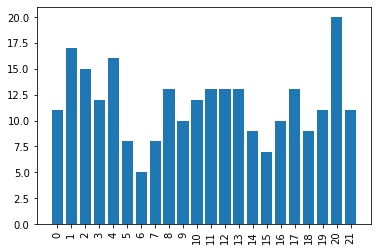

In [34]:
plt.figure()
for x in dataset:
    b = x['label'].numpy()
    lab, uniq = np.unique(b, return_counts=True)
    plt.bar(range(len(lab)), uniq)
    plt.xticks(range(len(lab)), lab, rotation=90)
    break

plt.show()

tf.Tensor(b'ZTF17aaaskke', shape=(), dtype=string)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21], dtype=int32), array([16, 11, 10, 15, 12, 12, 10, 14,  9,  5, 13, 12,  8, 12,  9, 16,  9,
        5, 15, 16, 15, 12]))


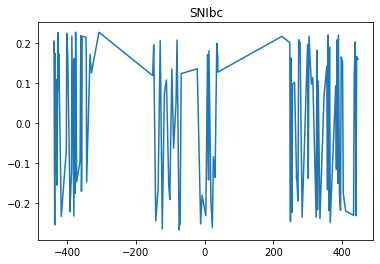

In [35]:
for batch in dataset:
    print(batch['lcid'][0])
    print(np.unique(batch['label'], return_counts=True))
    lc = tf.boolean_mask(batch['values'][0], batch['mask'][0][...,0])

    plt.plot(lc[:, 0], lc[:, 1])
    
    plt.title('{}'.format(class_names[batch['label'][0]]))
    break